# Credit Score Classification : Basic Example Notebook

This is an example notebook for the FML Kaggle Challenge. Here are some basic steps to preprocess, train et generate predictions.
### Caution: Some of the steps here are just explanatories, you will still need to change and add steps to perform well in the challenge 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Dataset

In [17]:
train_data = pd.read_csv('/Users/jojolapatate/Documents/M2 ESSEC CENTRALE/FML/Assignment2/train_set.csv', index_col= 0)
test_data = pd.read_csv('/Users/jojolapatate/Documents/M2 ESSEC CENTRALE/FML/Assignment2/test_set.csv', index_col= 0)

/var/folders/bv/5s8wgnqx04n66t4k9rrp0ygh0000gn/T/ipykernel_2033/3453197153.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()
/var/folders/bv/5s8wgnqx04n66t4k9rrp0ygh0000gn/T/ipykernel_2033/3453197153.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

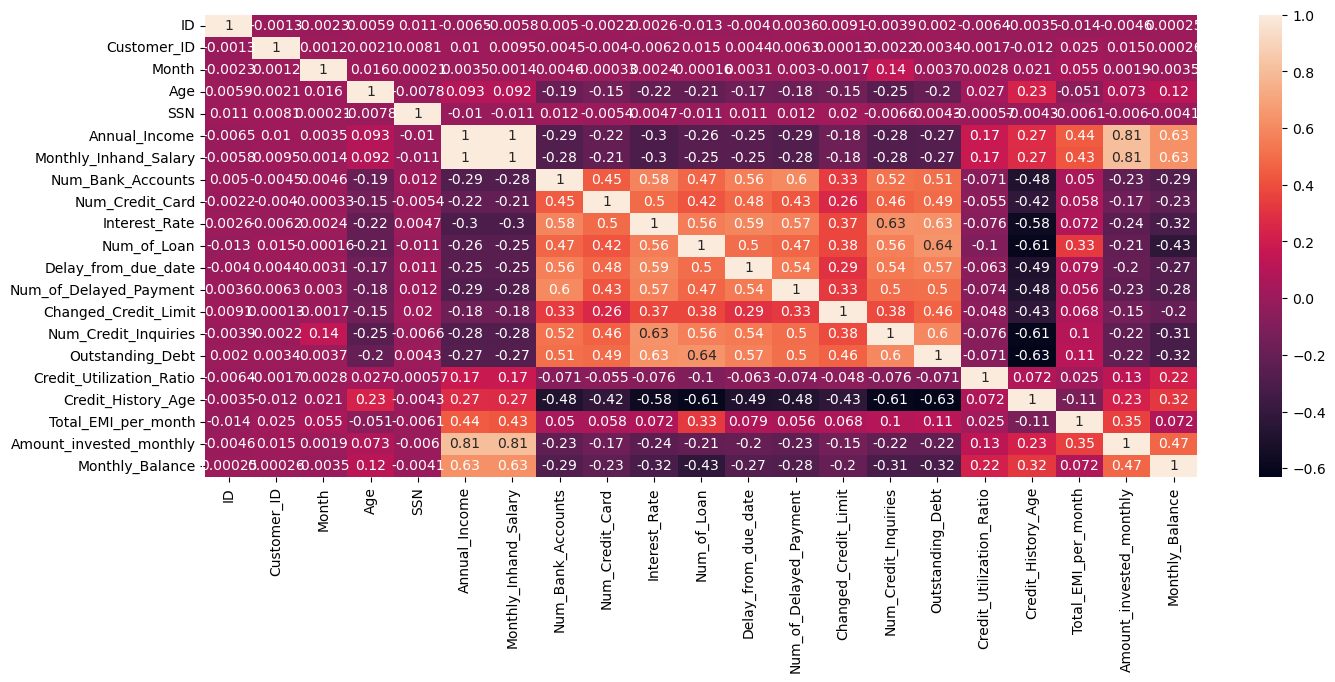

In [172]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(train_data.corr(), annot=True)


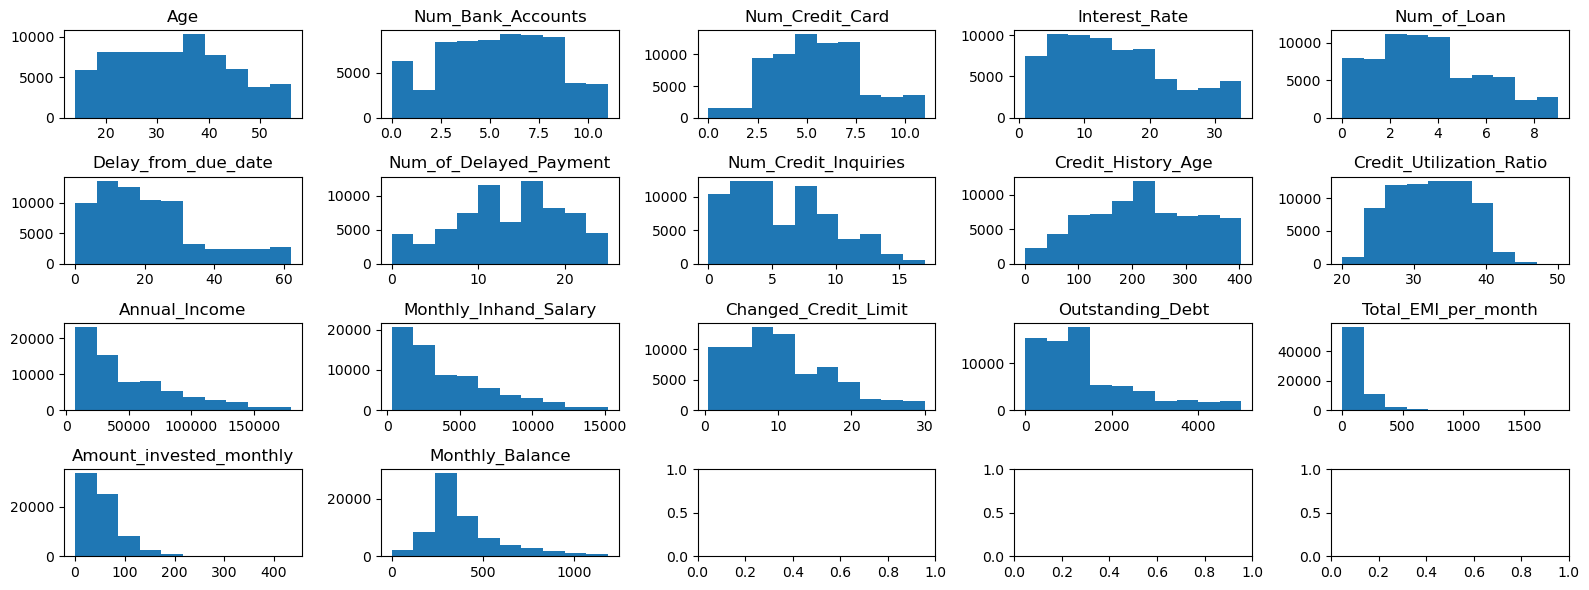

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(16, 6))

for i, element in enumerate(numerical_columns):
    row = i // 5  # Calculate the row index
    col = i % 5   # Calculate the column index
    ax[row, col].hist(train_data[element])
    ax[row, col].set_title(element)

plt.tight_layout()
plt.show()

## Selecting Features and Encoding

In this example, we only consider numerical values but some categorical values might be of help

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve

from sklearn.ensemble import AdaBoostClassifier



In [252]:
#FIT NORMAL MODEL TO GET FEATURE IMPORTANCE
X_train = train_data.drop(columns=[ 'Customer_ID', "Name", 'SSN', 'Credit_Score', 'Type_of_Loan'])
y_train = train_data['Credit_Score']
label_encoder = LabelEncoder()
feature_encoder = OrdinalEncoder()

#ENCODE 
y_train = label_encoder.fit_transform(y_train).astype(int)
X_train[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']] = feature_encoder.fit_transform(X_train[['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']])



1.0
These are the cross validation scores for pca [0.79883929 0.80732143 0.81       0.80142857 0.79410714]


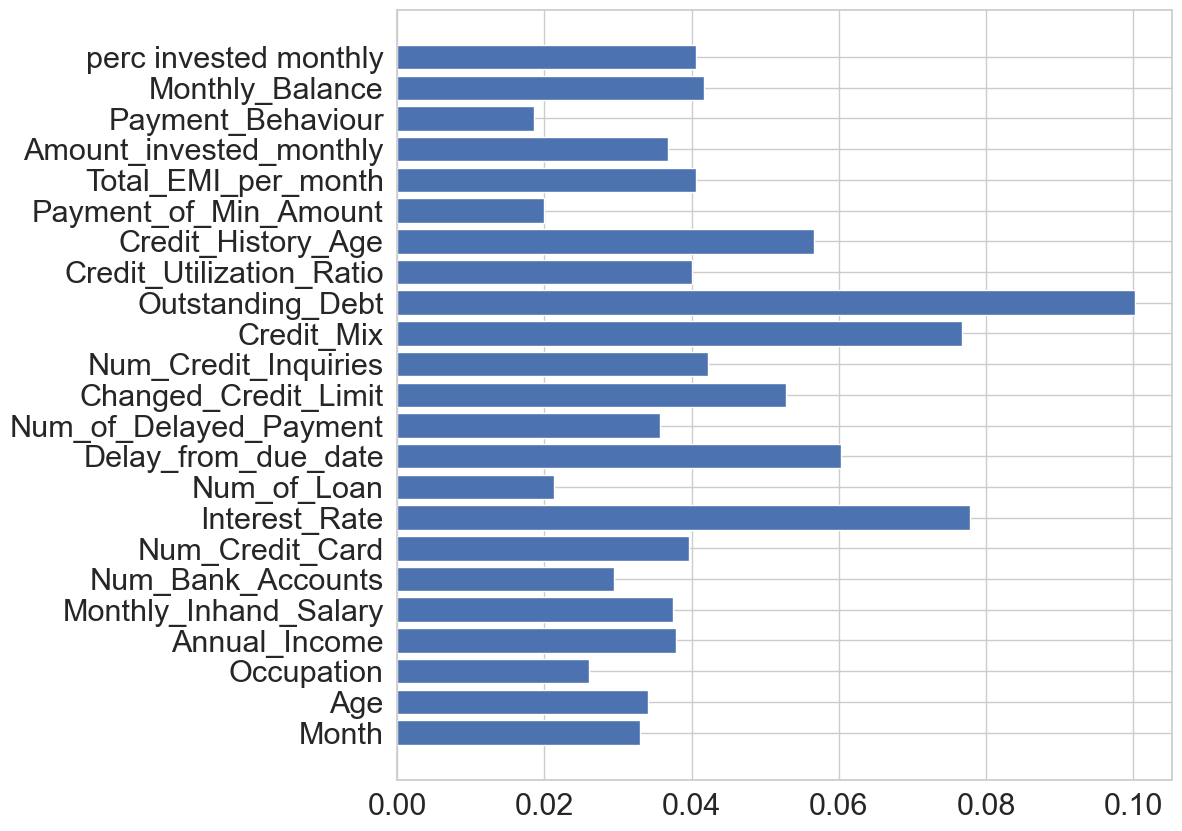

In [194]:
#CHECK FEATURE IMPORTANCE, keeping all features with a baseline RF model
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)
y_train_pred = RF.predict(X_train)
print(accuracy_score(y_train_pred, y_train))

kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
scores = cross_val_score(RF, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores for {scores}')

plt.figure(figsize=(10, 10))
plt.barh(X_train.columns, RF.feature_importances_)

plt.show()

In [31]:
def preprocess(train, test):

    #encode type of loan

    def one_hot_encoding_loan_type(df):

        loan_types = df['Type_of_Loan'].str.split(',', expand=True)

        # Get all unique loan types
        unique_loan_types = loan_types.stack().unique()

        # Create a new DataFrame to store loan type counts
        loan_counts = pd.DataFrame(index=df.index)

        # Iterate over unique loan types and count occurrences
        for loan_type in unique_loan_types:
            loan_counts[loan_type] = loan_types.apply(lambda row: row.str.contains(loan_type).sum(), axis=1)

        # Display the DataFrame with loan type counts
        loan_counts = pd.DataFrame(loan_counts)

        df = pd.concat([df, loan_counts], axis=1)
        df = df.drop(columns=['No Data', 'not specified'])
        return df

    train = one_hot_encoding_loan_type(train)
    test = one_hot_encoding_loan_type(test)
    


    #Drop unnecessary columns : Customer_id, Name, SSN,
    train_data_filter = train.drop(columns=[ 'Customer_ID', "Name", 'SSN','Type_of_Loan'])
    test_data_filter = test.drop(columns=[ 'Customer_ID', "Name", 'SSN', 'Type_of_Loan' ])


    #Adding feature interaction:
    train_data_filter['income_age'] = train_data_filter['Annual_Income']*train_data_filter['Age']
    test_data_filter['income_age'] = test_data_filter['Annual_Income']*test_data_filter['Age']

    test_data_filter['card_bank'] = test_data_filter['Num_Bank_Accounts']*test_data_filter['Num_Credit_Card']
    train_data_filter['card_bank'] = train_data_filter['Num_Bank_Accounts']*train_data_filter['Num_Credit_Card']

    train_data_filter['DTI_ratio'] = (train_data_filter['Outstanding_Debt']/train_data_filter['Annual_Income'])*100
    test_data_filter['DTI_ratio'] = (test_data_filter['Outstanding_Debt']/test_data_filter['Annual_Income'])*100

    train_data_filter['ITS_ratio'] = (train_data_filter['Amount_invested_monthly']/train_data_filter['Monthly_Inhand_Salary'])*100
    test_data_filter['ITS_ratio'] = (test_data_filter['Amount_invested_monthly']/test_data_filter['Monthly_Inhand_Salary'])*100

    train_data_filter['Instalments_to_Salary'] = ((train_data_filter['Total_EMI_per_month']*12)/train_data_filter['Annual_Income'])*100
    test_data_filter['Instalments_to_Salary'] = ((test_data_filter['Total_EMI_per_month']*12)/test_data_filter['Annual_Income'])*100


    #Encode rest of variables

    label_encoder = LabelEncoder()
    
    desired_categories = [['Poor', 'Standard', 'Good']]
    feature_encoder = OrdinalEncoder(categories = desired_categories)
    y_train = feature_encoder.fit_transform(train_data_filter[['Credit_Score']]).ravel()

    desired_categories_2 = ['Bad', 'Standard', 'Good']
    feature_encoder_2 = OrdinalEncoder(categories = [desired_categories_2])
    train_data_filter[ 'Credit_Mix'] = feature_encoder_2.fit_transform(train_data_filter[ 'Credit_Mix'].values.reshape(-1, 1))  
    test_data_filter[ 'Credit_Mix'] = feature_encoder_2.fit_transform(test_data_filter[ 'Credit_Mix'].values.reshape(-1, 1)) 

   
    train_data_filter['Payment_Behaviour'] = label_encoder.fit_transform(train_data_filter['Payment_Behaviour'])
    train_data_filter['Occupation'] = label_encoder.fit_transform(train_data_filter['Occupation'])
    train_data_filter[ 'Payment_of_Min_Amount'] = label_encoder.fit_transform(train_data_filter[ 'Payment_of_Min_Amount']) 
  
    test_data_filter[ 'Payment_of_Min_Amount'] = label_encoder.fit_transform(test_data_filter[ 'Payment_of_Min_Amount']) 
    test_data_filter['Occupation'] = label_encoder.fit_transform(test_data_filter['Occupation'])
    test_data_filter['Payment_Behaviour'] = label_encoder.fit_transform(test_data_filter['Payment_Behaviour'])

    #Define X_train, X_test
    X_train = train_data_filter.drop(columns = 'Credit_Score' )
    X_test = test_data_filter
    
    X_test = X_test[X_train.columns]
    #Normalize
    def normalize(X_train, X_test):
        scaler = preprocessing.StandardScaler()
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
        X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
        
        return X_train_scaled_df, X_test_scaled_df

    X_train, X_test= normalize(X_train, X_test)

    
    return X_train, y_train, X_test, feature_encoder

In [32]:
X_train, y_train, X_test, feature_encoder = preprocess(train_data, test_data)


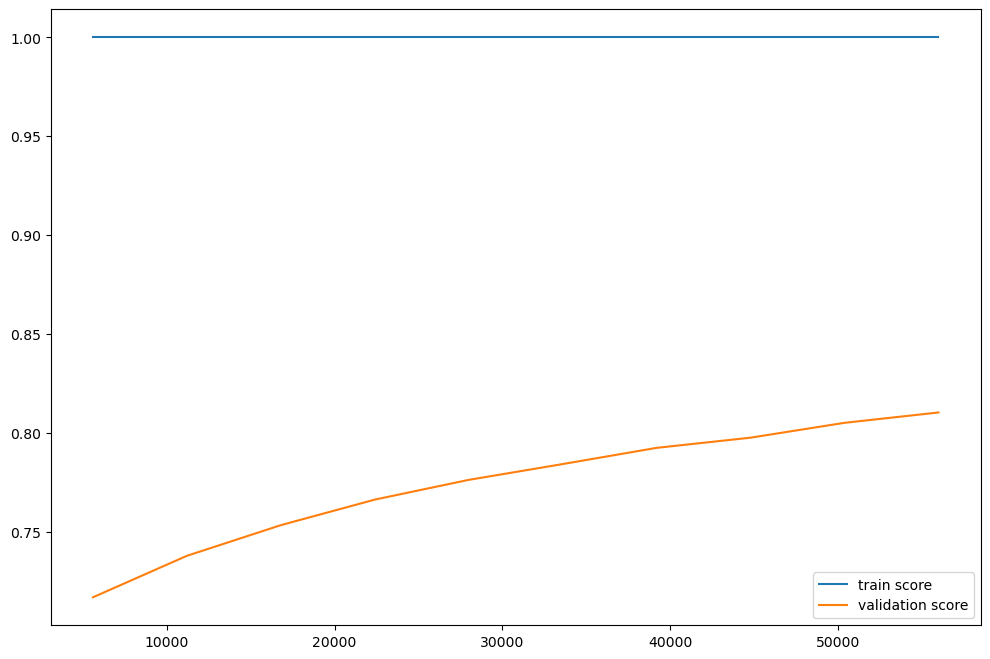

In [13]:
#LEARNING CURVE

RF= RandomForestClassifier(random_state= 0)
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)

def evaluation(model):
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=kfold, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

evaluation(RF)

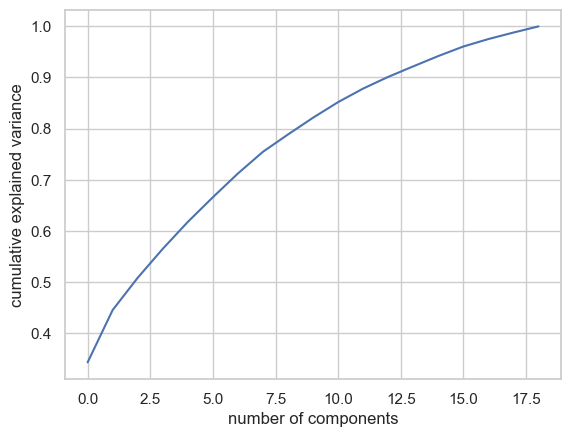

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.342456,0.342456
1,0.444970,0.102515
2,0.508070,0.063099
3,0.564717,0.056647
4,0.617399,0.052682
5,0.665614,0.048215
6,0.712133,0.046519
7,0.754642,0.042509
8,0.788496,0.033854
9,0.821311,0.032814


In [23]:
#PCA
pca_test = PCA(n_components=19)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(19))

In [31]:
#PCA pt 2
pca_final = PCA(n_components=10)
pca_final.fit(X_train)
X_train_pca = pca_final.transform(X_train)
X_test_pca = pca_final.transform(X_test)

## Optimize Parameters

We established PCA was useless and that our model wasn't overfitting; Now we want to optimize parameters to improve test accuracy, which is around 80% with baseline model

In [ ]:
#Randomized search to add to optimize hyperparameter
kfold = StratifiedKFold(n_splits=2, random_state=42, shuffle = True)
model = RandomForestClassifier(random_state=0)

space = dict()
space['n_estimators'] = [int(x) for x in np.linspace(start = 800, stop = 2000, num = 20)]
space['max_features'] = [4, 5, 6]
space['max_depth']= [20, 30, 80]
space['min_samples_split'] : [2, 5, 7]

search = RandomizedSearchCV(model, space, scoring = 'accuracy', n_iter= 50,cv = kfold, refit = True)
result = search.fit(X_train, y_train)

# Obtain the best parameters
best_params = result.best_params_
print("Best Parameters:", best_params)

#Best Parameters: {'n_estimators': 1873, 'max_features': 6, 'max_depth': 80}


In [101]:
rs_df = pd.DataFrame(result.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_max_features,param_max_depth,mean_test_score,rank_test_score
0,1873,6,80,0.792914,1
1,863,5,80,0.792643,2
2,1052,5,80,0.792571,3
3,1431,6,80,0.792357,4
4,1305,6,80,0.792257,5
5,1242,6,80,0.792243,6
6,1873,6,30,0.792143,7
7,1684,5,80,0.792129,8
8,1115,6,80,0.792086,9
9,1936,5,80,0.792071,10


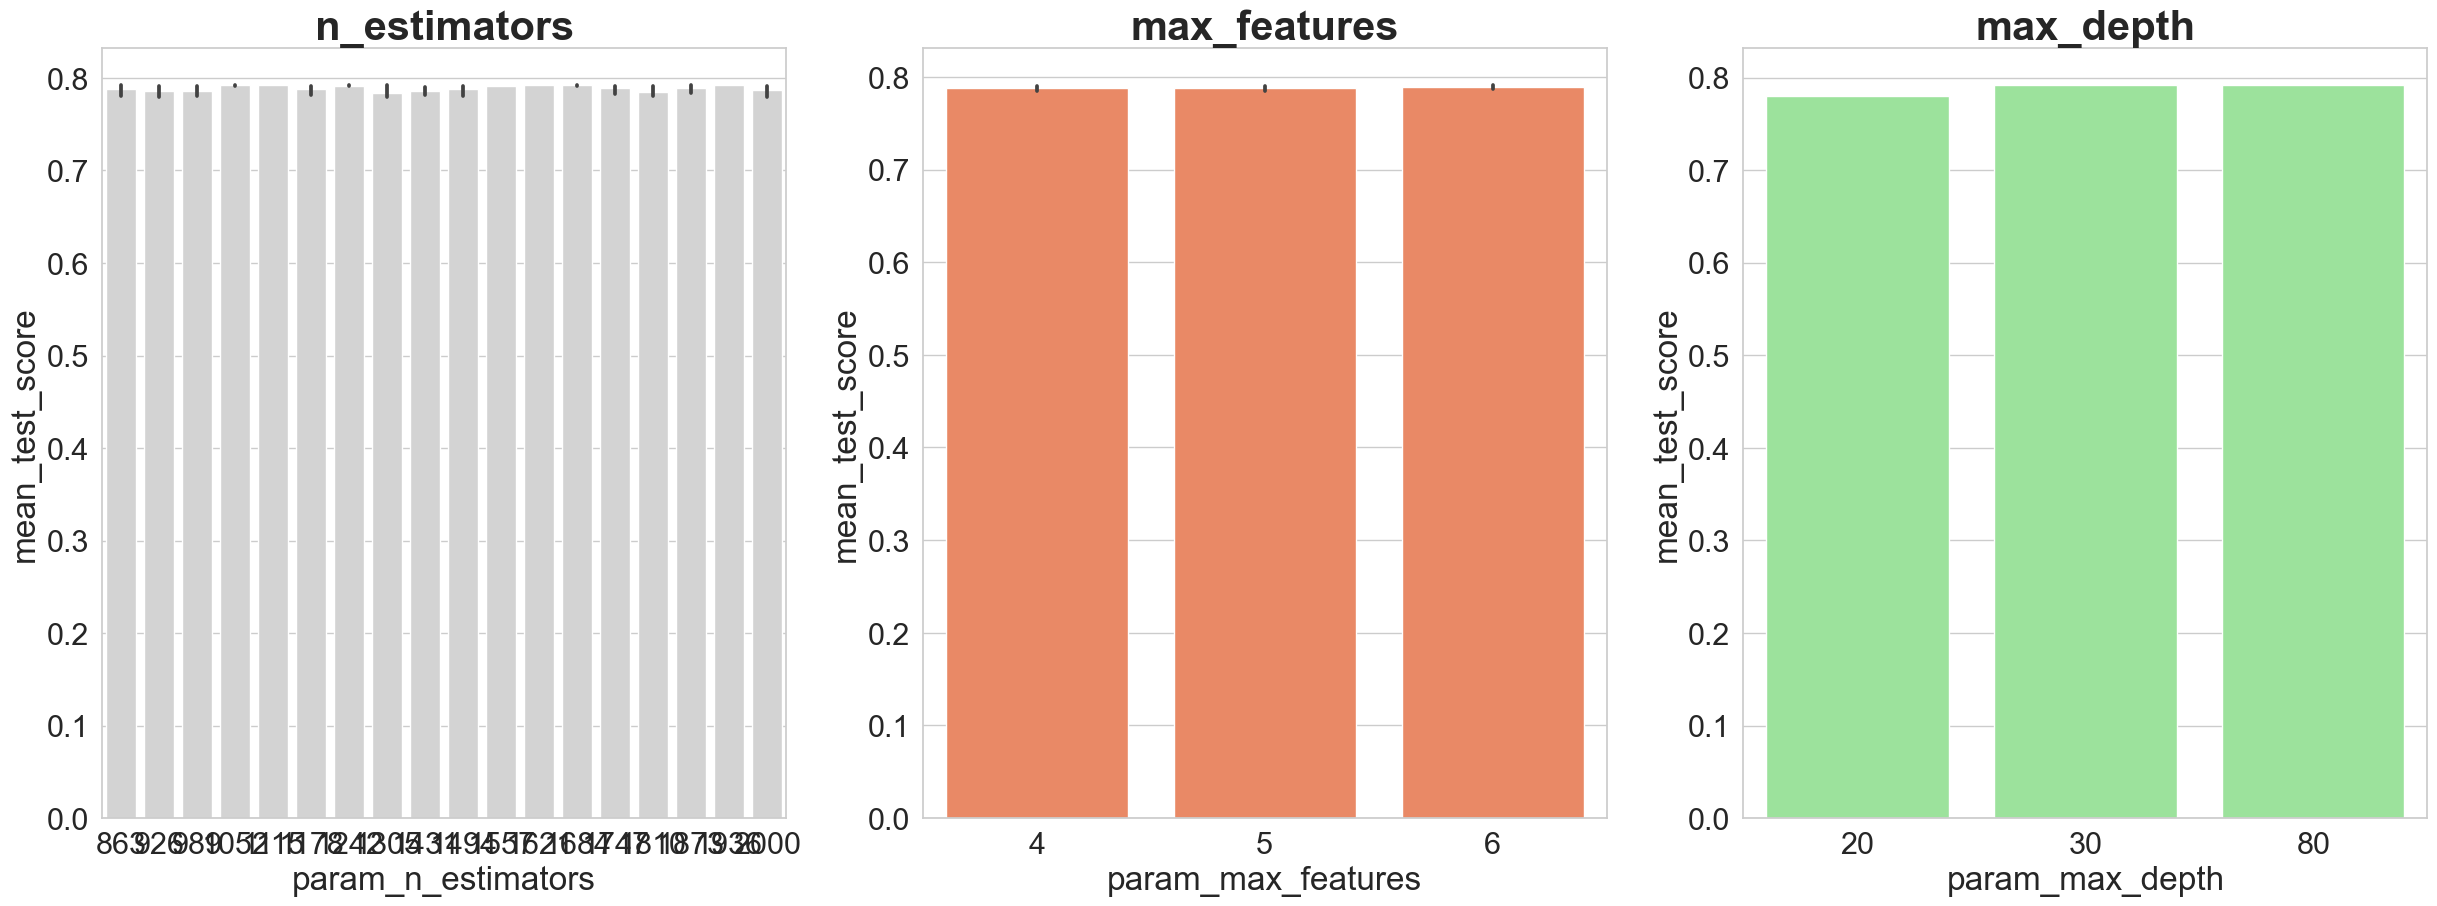

In [111]:
fig, axs = plt.subplots(ncols=3, nrows=1)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,10)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0], color='lightgrey')

axs[0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1], color='coral')

axs[1].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[2], color='lightgreen')

axs[2].set_title(label = 'max_depth', size=30, weight='bold')

plt.show()

In [ ]:
kfold = StratifiedKFold(n_splits=2, random_state=42, shuffle = True)
model = RandomForestClassifier(random_state=0)

space = dict()
space['n_estimators'] = [1000]
space['max_features'] = [4, 5]
space['min_samples_split'] = [2, 3, 4]
space['min_samples_leaf'] = [1, 2, 3]
search = GridSearchCV(model, space, scoring = 'accuracy',cv = kfold, refit = True)
result = search.fit(X_train, y_train)

# Obtain the best parameters
best_params = result.best_params_
print("Best Parameters:", best_params)

#Best Parameters: {'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


## Evaluation

In [33]:
#Cross validation scores for type of loan encoded, 1873+max6 features, Standardization 
#adding annual_income*age, and card bank, DTI ratio, + the 2 others -> best score
model = make_pipeline(RandomForestClassifier(random_state=0, n_estimators= 1873, max_features = 6))
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(f'These are the cross validation scores {scores}')

#[0.82421429 0.824  0.81921429 0.82442857 0.82792857]

KeyboardInterrupt: 

## Generating the Submission

Below you will find a function that does the predictions for the test set and generates a submission, this submission is to be uploaded to kaggle to update the leaderboard

In [7]:
RF = make_pipeline(RandomForestClassifier(random_state=0, n_estimators= 1873, max_features= 6))
RF.fit(X_train, y_train)


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_features=6, n_estimators=1873,
                                        random_state=0))])

In [8]:
def generate_submission(X_test):
    list_of_predictions = RF.predict(X_test)
    label_map = {0: 'Poor', 1: 'Standard', 2: 'Good'}

# Replace numeric values with corresponding labels using the map
    mapped_labels = [label_map[val] for val in list_of_predictions]
    df = pd.DataFrame({'Credit_Score': mapped_labels}, index=X_test.index)
    df.to_csv('/Users/jojolapatate/Documents/M2 ESSEC CENTRALE/FML/Assignment2/sandbox_submission.csv')
    
    

In [9]:
generate_submission(X_test)


In [ ]:
#to add
#confusion matrix, gridsearchCV better made, comparison of all base models, comparison for polynomial features, 
#try log transform instead of standard scaler

#see without occupation to see if it's wrongly encoded (or have binaries)